In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np


In [ ]:
model = models.Sequential()
model.add(layers.Dense(100,'relu', input_shape=(28*28*1,)))
#model.add(layers.Conv2D(4,(2,2), input_shape=(28,28,1)))#default is data_format=channels_last
#model.add(layers.Flatten())
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(10,'softmax'))
print(model.summary())


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_58 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_59 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
None


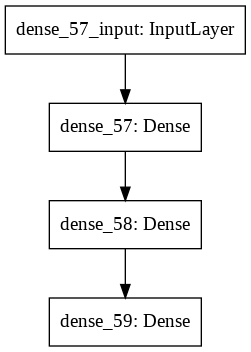

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
#(train_images, train_labels), (test_images, test_labels) = (np.expand_dims(train_images,-1), train_labels), (np.expand_dims(test_images,-1), test_labels)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
#train_images.reshape(60000,28*28)

In [ ]:
#test_images.shape

In [ ]:
#test_images.reshape(10000,28*28)

In [ ]:
import numpy as np
training_history=model.fit(train_images.reshape(60000,28*28), train_labels, validation_data=(test_images.reshape(10000,28*28), test_labels), epochs=20, batch_size=100)

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 2.3167 - acc: 0.8591 - val_loss: 0.5714 - val_acc: 0.9250
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.4689 - acc: 0.9286 - val_loss: 0.4448 - val_acc: 0.9300
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2859 - acc: 0.9457 - val_loss: 0.2849 - val_acc: 0.9494
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2038 - acc: 0.9565 - val_loss: 0.2468 - val_acc: 0.9482
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1674 - acc: 0.9622 - val_loss: 0.2887 - val_acc: 0.9522
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1498 - acc: 0.9668 - val_loss: 0.2376 - val_acc: 0.9572
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1350 - acc: 0.9700 - val_loss: 0.2334 - val_acc: 0.9605
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.

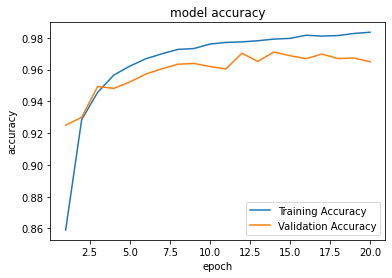

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs,training_history.history['acc'],label='Training Accuracy')
plt.plot(epochs,training_history.history['val_acc'],label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()


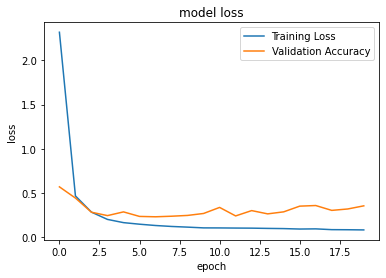

In [ ]:
plt.plot(training_history.history['loss'],label='Training Loss')
plt.plot(training_history.history['val_loss'],label='Validation Accuracy')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()


# Let's reshape into video data
Say we take every 10 frames of the 60K into one video stream:

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
(train_images, train_labels), (test_images, test_labels) = (np.reshape(train_images, (6000,10,28*28)), np.reshape(train_labels, (6000,10))), (np.reshape(test_images, (1000,10,28*28)), np.reshape(test_labels, (1000,10)))

In [ ]:

training_history=model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=75, batch_size=100)   #when reshape into video we need more epochs and more layers

Epoch 1/75
60/60 [==============================] - 0s 5ms/step - loss: 0.0377 - acc: 0.9911 - val_loss: 0.1963 - val_acc: 0.9719
Epoch 2/75
60/60 [==============================] - 0s 4ms/step - loss: 0.0282 - acc: 0.9923 - val_loss: 0.1857 - val_acc: 0.9746
Epoch 3/75
60/60 [==============================] - 0s 4ms/step - loss: 0.0231 - acc: 0.9936 - val_loss: 0.1948 - val_acc: 0.9758
Epoch 4/75
60/60 [==============================] - 0s 4ms/step - loss: 0.0225 - acc: 0.9942 - val_loss: 0.2206 - val_acc: 0.9726
Epoch 5/75
60/60 [==============================] - 0s 4ms/step - loss: 0.0202 - acc: 0.9943 - val_loss: 0.1887 - val_acc: 0.9738
Epoch 6/75
60/60 [==============================] - 0s 3ms/step - loss: 0.0163 - acc: 0.9952 - val_loss: 0.1845 - val_acc: 0.9763
Epoch 7/75
60/60 [==============================] - 0s 4ms/step - loss: 0.0167 - acc: 0.9955 - val_loss: 0.1898 - val_acc: 0.9758
Epoch 8/75
60/60 [==============================] - 0s 3ms/step - loss: 0.0206 - acc: 0.99

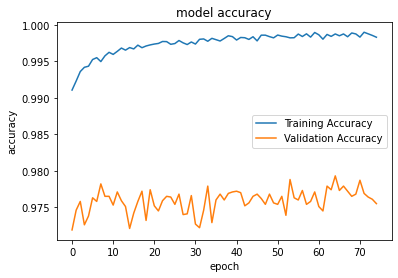

In [ ]:
plt.plot(training_history.history['acc'],label='Training Accuracy')
plt.plot(training_history.history['val_acc'],label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()


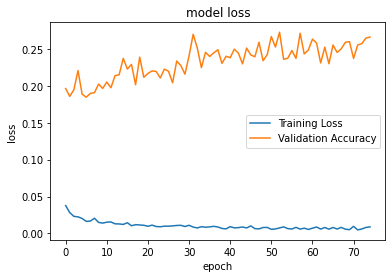

In [ ]:
plt.plot(training_history.history['loss'],label='Training Loss')
plt.plot(training_history.history['val_loss'],label='Validation Accuracy')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()


__So how can we feed the 5D video data?__

# TimeDistributed to the rescue!

What we actually seek is to apply the __same__ filter, across all the video frames (we don't need a separate parameters for every frame)


This wrapper applies a layer to every temporal slice of an input.

The input should be at least 3D, and the dimension of index one will be considered to be the temporal dimension.



In [ ]:
model = models.Sequential()
model.add(layers.TimeDistributed(layers.Dense(100,'relu'), input_shape=(10,28*28)))
#model.add(layers.TimeDistributed(layers.Conv2D(4,(2,2)), input_shape=(10, 28,28,1)))
#model.add(layers.Flatten())
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(10,'softmax'))
#model.build(input_shape=(10,28*28,1))
print(model.summary())


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_6 (TimeDist (None, 10, 100)           78500     
_________________________________________________________________
dense_61 (Dense)             (None, 10, 100)           10100     
_________________________________________________________________
dense_62 (Dense)             (None, 10, 10)            1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['acc'])

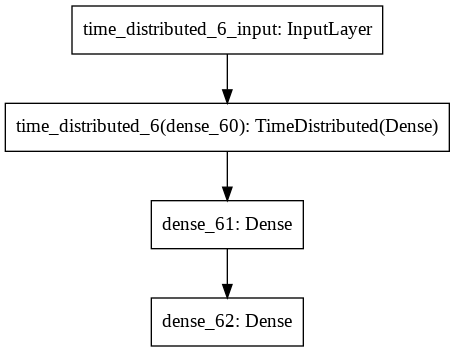

In [ ]:
plot_model(model, to_file='model.png')

Notice how the number of parameters remain the same (20)! 

Since we repeat the same filter across all the frames.

However, the output of flatten is x10, since we just concat all the frames outputs.

In [ ]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#(train_images, train_labels), (test_images, test_labels) = (np.reshape(train_images, (6000,10,28,28,1)), np.reshape(train_labels, (6000,10,1))), (np.reshape(test_images, (1000,10,28,28,1)), np.reshape(test_labels, (1000,10,1)))
train_images, test_images = np.reshape(train_images, (6000,10,28*28)), np.reshape(test_images, (1000,10,28*28))

In this case, we are __grouping/summarizing__ every 10 frames into one video, which can have __one__label.

So we need to take the last labels of every 10 as the video label:
But if we want to do this, we can'

In [ ]:
#train_labels[::10].shape

In [ ]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(6000, 10, 784)
(1000, 10, 784)
(60000,)
(10000,)


In [ ]:
print(train_labels.shape)

(60000,)


In [ ]:
#train_labels = train_labels[::10]
#test_labels = test_labels[::10]

In [ ]:

training_history=model.fit(np.reshape(train_images,(6000,10,784)), np.reshape(train_labels,(6000,10,1)), validation_data=(np.reshape(test_images,(1000,10,784)), np.reshape(test_labels,(1000,10,1))), epochs=20, batch_size=100)

Epoch 1/20
60/60 [==============================] - 0s 5ms/step - loss: 8.5787 - acc: 0.4590 - val_loss: 6.0943 - val_acc: 0.6149
Epoch 2/20
60/60 [==============================] - 0s 3ms/step - loss: 5.6480 - acc: 0.6405 - val_loss: 4.5311 - val_acc: 0.7113
Epoch 3/20
60/60 [==============================] - 0s 4ms/step - loss: 4.4789 - acc: 0.7148 - val_loss: 4.5182 - val_acc: 0.7127
Epoch 4/20
60/60 [==============================] - 0s 3ms/step - loss: 4.3064 - acc: 0.7263 - val_loss: 4.1608 - val_acc: 0.7368
Epoch 5/20
60/60 [==============================] - 0s 3ms/step - loss: 3.7979 - acc: 0.7574 - val_loss: 2.8193 - val_acc: 0.8169
Epoch 6/20
60/60 [==============================] - 0s 3ms/step - loss: 2.6293 - acc: 0.8306 - val_loss: 2.7912 - val_acc: 0.8186
Epoch 7/20
60/60 [==============================] - 0s 3ms/step - loss: 2.5277 - acc: 0.8370 - val_loss: 2.6801 - val_acc: 0.8271
Epoch 8/20
60/60 [==============================] - 0s 4ms/step - loss: 2.4586 - acc: 0.84

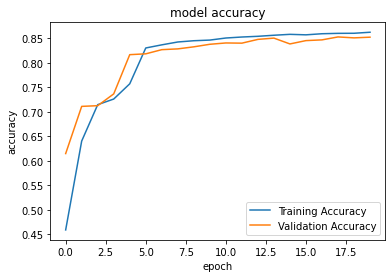

In [ ]:
plt.plot(training_history.history['acc'],label='Training Accuracy')
plt.plot(training_history.history['val_acc'],label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()


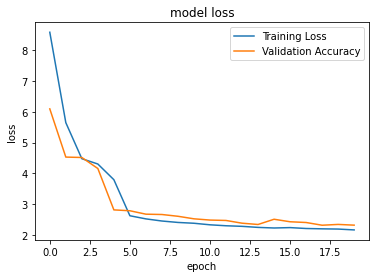

In [ ]:
plt.plot(training_history.history['loss'],label='Training Loss')
plt.plot(training_history.history['val_loss'],label='Validation Accuracy')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()


Of course the results are too bad! Since mnist is not video. We just used it to proof the concept.

# If we wanted to have classification per frame

In [ ]:
frame_model = models.Sequential()
frame_model.add(layers.Dense(100, activation='relu', input_shape=(28*28,)))
#frame_model.add(layers.Conv2D(4,(2,2), input_shape=(28,28,1)))
#frame_model.add(layers.Flatten())
frame_model.add(layers.Dense(100, activation='relu'))
frame_model.add(layers.Dense(10, activation='softmax'))
print(frame_model.summary())



Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_64 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_65 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
None


In this case, we have the same output shape as before for every frame

In [ ]:
#model = models.Sequential()
#model.add(layers.TimeDistributed(frame_model, input_shape=(10, 28*28,1)))
#model.summary()

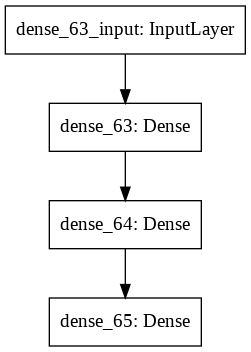

In [ ]:
plot_model(frame_model, to_file='model.png')

The number of parameters remain the same, since we just repeat the same CNN



In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = (np.reshape(train_images, (60000,28*28)), np.reshape(train_labels, (60000))), (np.reshape(test_images, (10000,28*28)), np.reshape(test_labels, (10000)))

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
frame_model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:

training_history=frame_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20, batch_size=100)

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 2.4365 - acc: 0.8620 - val_loss: 0.5096 - val_acc: 0.9247
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.4055 - acc: 0.9291 - val_loss: 0.3012 - val_acc: 0.9381
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2401 - acc: 0.9464 - val_loss: 0.2305 - val_acc: 0.9512
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1881 - acc: 0.9562 - val_loss: 0.2460 - val_acc: 0.9531
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1616 - acc: 0.9624 - val_loss: 0.2647 - val_acc: 0.9556
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1425 - acc: 0.9668 - val_loss: 0.2478 - val_acc: 0.9561
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1333 - acc: 0.9688 - val_loss: 0.2496 - val_acc: 0.9597
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.

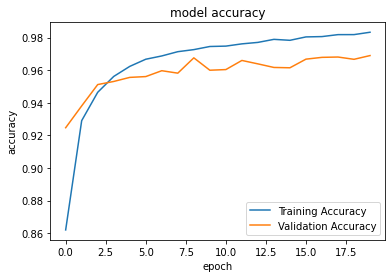

In [ ]:
plt.plot(training_history.history['acc'],label='Training Accuracy')
plt.plot(training_history.history['val_acc'],label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()


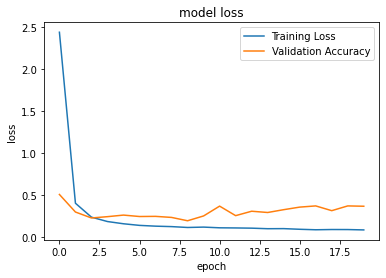

In [ ]:
plt.plot(training_history.history['loss'],label='Training Loss')
plt.plot(training_history.history['val_loss'],label='Validation Accuracy')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
